# imblearn para desbalanceo de clases

* En muchos problemas de machine learning, especialmente en clasificación, nos encontramos con conjuntos de datos en los que una clase (llamada minoritaria) tiene un número mucho menor de muestras comparada con la otra u otras clases (llamadas mayoritarias). 
Por ejemplo, un escenario clásico es la detección de fraude en tarjetas de crédito: la gran mayoría de las transacciones son legítimas (clase mayoritaria), mientras que las transacciones fraudulentas (clase minoritaria) constituyen un porcentaje muy pequeño.

* Cuando los modelos de clasificación se entrenan con datos desbalanceados, pueden inclinarse en exceso a predecir siempre la clase mayoritaria, ya que estadísticamente "aciertan" la mayoría de las veces.
Esto puede reducir de forma drástica la capacidad para detectar adecuadamente la clase de interés (a menudo la minoritaria), que en muchos casos es la más importante (p. ej., detectar fraudes, enfermedades, etc.).

**SMOTE** son las siglas de **Synthetic Minority Over-sampling TEchnique.**

Se trata de una técnica de oversampling que genera nuevas muestras sintéticas de la clase minoritaria para aumentar su frecuencia en el dataset, con el objetivo de balancear mejor las clases.

* Cómo funciona:

* Identifica cada muestra de la clase minoritaria y localiza a sus vecinos más cercanos (según una métrica de distancia, típicamente la euclidiana).

* Selecciona de forma aleatoria algunos de estos vecinos y, a partir de ellos, genera nuevos ejemplos interpolando entre la muestra original y el vecino.  

 Esto significa que las características de las nuevas muestras se calculan como un punto situado en la línea que une la muestra original y su vecino

 * De esta manera, no se duplican simplemente las muestras minoritarias (como haría un Random Oversampling) sino que se generan ejemplos intermedios (sintéticos), lo que en muchos casos mejora la diversidad de la clase minoritaria y ayuda al modelo a generalizar mejor.

Ejemplos:
from iblearn.over_sampling import SMOTEfrom iblearn.under_sampling import RandomUnderSampler

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, ConfusionMatrixDisplay
from imblearn.over_sampling import SMOTE

# SMOTE para datos debalanceados make_classification

In [2]:
# Esto es para crear datos desbalanceados para probar SMOTE

X, y = make_classification(
    n_samples=300, # número total de filas
    n_features=2, # número de columnas en la X
    n_redundant=0, # número de columnas rebundantes
    n_clusters_per_class=1,
    n_informative=2,
    weights=[0.95, 0.5], # datos desbalanceados 
    class_sep=1,
    random_state=42
)

print(X[:5])
print(y[:5])
print(np.bincount(y))  # Vemos el desbalanceo cuenta cuántos 1 y 0 hay

[[ 0.73324554 -1.43100684]
 [ 1.14555473 -0.82480677]
 [ 0.53798312 -2.05654971]
 [ 1.39457591 -0.18326309]
 [ 0.72012412  0.97723685]]
[0 0 0 0 1]
[285  15]


In [3]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42, stratify=y)
print('Tamaño X_train', X_train.shape)
print('Distribución clase train', np.bincount(y_train))
print('Tamaño X_test', X_test.shape)
print('Distribución clase test', np.bincount(y_test))

Tamaño X_train (240, 2)
Distribución clase train [228  12]
Tamaño X_test (60, 2)
Distribución clase test [57  3]


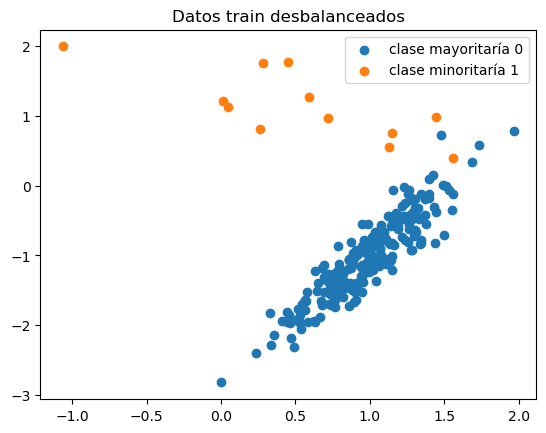

In [4]:

plt.scatter(X_train[y_train == 0, 0], X_train[y_train == 0, 1], label='clase mayoritaría 0')

plt.scatter(X_train[y_train == 1, 0], X_train[y_train == 1, 1], label='clase minoritaría 1')
plt.title('Datos train desbalanceados')
plt.legend()


              precision    recall  f1-score   support

           0       0.97      1.00      0.98        57
           1       1.00      0.33      0.50         3

    accuracy                           0.97        60
   macro avg       0.98      0.67      0.74        60
weighted avg       0.97      0.97      0.96        60



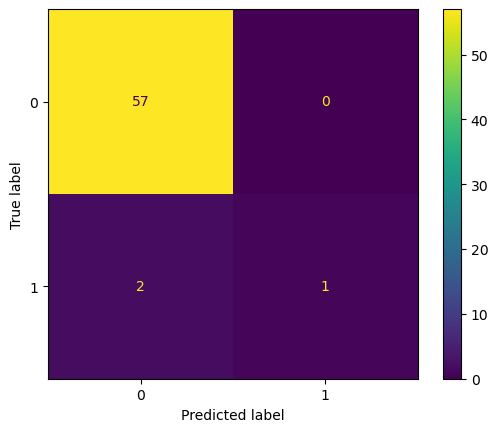

In [5]:
model = LogisticRegression(max_iter=1000)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

print(classification_report(y_test, y_pred))
ConfusionMatrixDisplay.from_estimator(model, X_test, y_test)


In [6]:
#Con SMOTE

smote = SMOTE(random_state=42)
X_train_resample, y_train_resample = smote.fit_resample(X_train, y_train) # Nos balancea

print('Tamaño X_train', X_train.shape)
print('Distribución clase train', np.bincount(y_train))

print('Tamaño X_test', X_train_resample.shape)
print('Distribución clase test', np.bincount(y_train_resample))

Tamaño X_train (240, 2)
Distribución clase train [228  12]
Tamaño X_test (456, 2)
Distribución clase test [228 228]


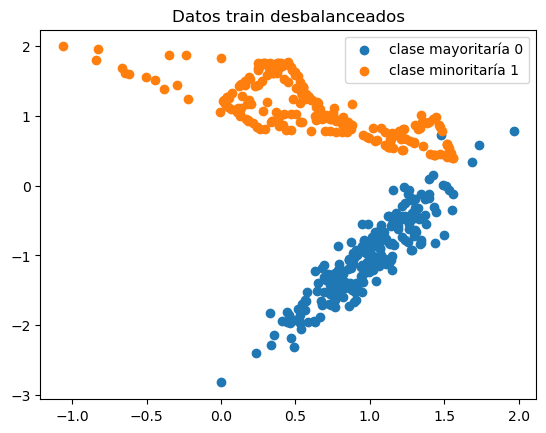

In [7]:
plt.scatter(X_train_resample[y_train_resample == 0, 0], X_train_resample[y_train_resample == 0, 1], label='clase mayoritaría 0')

plt.scatter(X_train_resample[y_train_resample == 1, 0], X_train_resample[y_train_resample == 1, 1], label='clase minoritaría 1')
plt.title('Datos train desbalanceados')
plt.legend()

              precision    recall  f1-score   support

           0       0.98      1.00      0.99        57
           1       1.00      0.67      0.80         3

    accuracy                           0.98        60
   macro avg       0.99      0.83      0.90        60
weighted avg       0.98      0.98      0.98        60



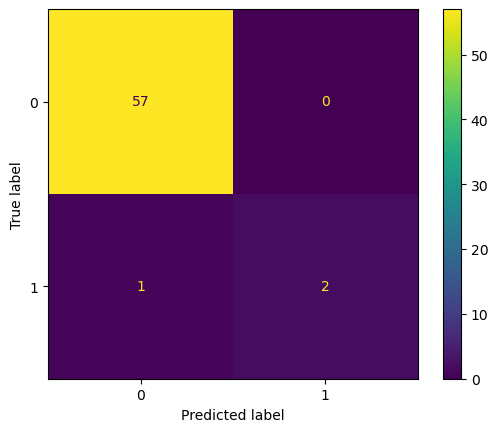

In [8]:
model = LogisticRegression(max_iter=1000)
model.fit(X_train_resample, y_train_resample)
y_pred = model.predict(X_test)

print(classification_report(y_test, y_pred))
ConfusionMatrixDisplay.from_estimator(model, X_test, y_test)

In [9]:

import pandas as pd
from sklearn.datasets import load_wine
wine = load_wine()
df = pd.DataFrame(wine.data, columns=wine.feature_names)
df['target'] = wine.target
df.head(5)

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline,target
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0,0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0,0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0,0
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0,0
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0,0


In [10]:
import seaborn as sns

df = sns.load_dataset('penguins').dropna()
df.head(1)

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,Male


In [11]:
print(df['island'].value_counts())

island
Biscoe       163
Dream        123
Torgersen     47
Name: count, dtype: int64


In [12]:
X = df.drop('island', axis=1)
X = pd.get_dummies(X)
y = df['island'].map({'Biscoe': 0, 'Dream': 1, 'Torgersen': 2})

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=42, stratify=y)

* Sin SMOTE

In [19]:
model = LogisticRegression(max_iter=5000)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

print(classification_report(y_test, y_pred))


              precision    recall  f1-score   support

           0       0.80      0.84      0.82        49
           1       0.70      0.81      0.75        37
           2       0.33      0.14      0.20        14

    accuracy                           0.73       100
   macro avg       0.61      0.60      0.59       100
weighted avg       0.70      0.73      0.71       100



d:\Nueva carpeta\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


* con SMOTE

In [20]:
smote = SMOTE(k_neighbors=9)
X_train_resample, y_train_resample = smote.fit_resample(X_train, y_train) # Nos balancea

print('Tamaño X_train', X_train.shape)
print('Distribución clase train', np.bincount(y_train))

print('Tamaño X_test', X_train_resample.shape)
print('Distribución clase test', np.bincount(y_train_resample))

Tamaño X_train (233, 9)
Distribución clase train [114  86  33]
Tamaño X_test (342, 9)
Distribución clase test [114 114 114]


In [22]:
model = LogisticRegression(max_iter=5000)
model.fit(X_train_resample, y_train_resample)
y_pred = model.predict(X_test)

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.93      0.84      0.88        49
           1       1.00      0.68      0.81        37
           2       0.35      0.79      0.49        14

    accuracy                           0.77       100
   macro avg       0.76      0.77      0.73       100
weighted avg       0.88      0.77      0.80       100



d:\Nueva carpeta\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


# Lo metemos en un Pipeline con SMOTE

In [25]:
 # Con pipeline
 # IMPORTANTE:  debemos usar el pipeline de imblearn
 
from imblearn.pipeline import Pipeline, make_pipeline
from sklearn.preprocessing import StandardScaler
pipeline = make_pipeline(
    StandardScaler(),
    SMOTE(k_neighbors=9),
    LogisticRegression(max_iter=5000)
)

pipeline.fit(X_train, y_train)
y_pred = pipeline.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.95      0.82      0.88        49
           1       0.83      0.68      0.75        37
           2       0.36      0.71      0.48        14

    accuracy                           0.75       100
   macro avg       0.71      0.74      0.70       100
weighted avg       0.82      0.75      0.77       100



In [26]:
 
from imblearn.pipeline import Pipeline, make_pipeline
from sklearn.preprocessing import StandardScaler
pipeline = make_pipeline(
   LogisticRegression(max_iter=5000)
)

pipeline.fit(X_train, y_train)
y_pred = pipeline.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.80      0.84      0.82        49
           1       0.70      0.81      0.75        37
           2       0.33      0.14      0.20        14

    accuracy                           0.73       100
   macro avg       0.61      0.60      0.59       100
weighted avg       0.70      0.73      0.71       100



d:\Nueva carpeta\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [29]:
 
from imblearn.pipeline import Pipeline, make_pipeline

pipeline = make_pipeline(
    SMOTE(k_neighbors=9),
    LogisticRegression(max_iter=5000)
)

pipeline.fit(X_train, y_train)
y_pred = pipeline.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.98      0.84      0.90        49
           1       1.00      0.68      0.81        37
           2       0.39      0.93      0.55        14

    accuracy                           0.79       100
   macro avg       0.79      0.81      0.75       100
weighted avg       0.90      0.79      0.82       100



d:\Nueva carpeta\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
